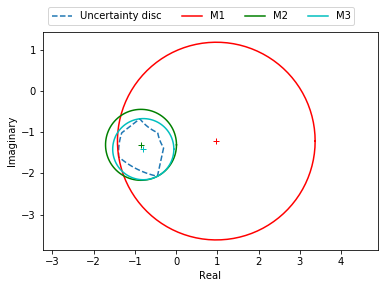

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from utils import circle


w = 0.5
s = w * 1j

plt.figure('Figure 7.7')

# uncertainty disc


def Gp(k, tau, theta):
    return k / (tau * s + 1) * np.exp(-theta * s)

n = 20
p = np.linspace(2, 3, n)
tau = 2
theta = 2
g0 = []
for k in range(2, 3+1):
    g0.append(Gp(k, tau, theta))
for l in range(1, n):
    theta = p[l]
    g0.append(Gp(k, tau, theta))
for l in range(1, n):
    tau = p[l]
    g0.append(Gp(k, tau, theta))
k = 2
g0.append(Gp(k, tau, theta))
for l in range(n-2, -1, -1):
    theta = p[l]
    g0.append(Gp(k, tau, theta))
for l in range(n-2, -1, -1):
    tau = p[l]
    g0.append(Gp(k, tau, theta))

g0 = np.array(g0)
rea = np.real(g0)
img = np.imag(g0)
plt.plot(rea, img, '--')

# M1 Simplified nominal model with no time delay
g1 = Gp(2.5, 2.5, 0)
r1 = np.max(np.abs(g1 - g0))
[c1x, c1y] = circle(np.real(g1), np.imag(g1), r1)
plt.plot(c1x, c1y, 'r')

# M2 Mean parameter values
g2 = Gp(2.5, 2.5, 2.5)
r2 = np.max(np.abs(g2 - g0))
[c2x, c2y] = circle(np.real(g2), np.imag(g2), r2)
plt.plot(c2x, c2y, 'g')

# M3 Nominal model corresponding to the smallest radius
def maxrad(g):
    g = complex(*g)
    return np.max(np.abs(g - g0))

result = minimize(maxrad, [np.real(g2), np.imag(g2)])
g3 = complex(*result.x)
r3 = np.max(np.abs(g3 - g0))
[c3x, c3y] = circle(np.real(g3), np.imag(g3), r3)

plt.plot(c3x, c3y, 'c')

plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend(['Uncertainty disc', 'M1', 'M2', 'M3'],
           bbox_to_anchor=(0, 1.01, 1, 0), loc=3, ncol=4)

plt.plot(np.real(g1), np.imag(g1), '+r')
plt.plot(np.real(g2), np.imag(g2), '+g')
plt.plot(np.real(g3), np.imag(g3), '+c')
# We need this for the circles to be circular
plt.axis('equal')
plt.show()
